Based on a post @ [Towards Data Science](https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e).

# Fine-tuning XGBoost in Python like a boss

"Why is fine-tuning key?"
- "Because if you have big datasets, and you run a naive grid search on 5 different parameters and having for each of them 5 possible values, then you’ll have $5^5 =3,125$ iterations to go".
- "If one iteration takes 10 minutes to run, you’ll have more than 21 days to wait before getting your parameters (I don't talk about Python crashing, without letting you know, and you waiting too long before realizing it)".

> "I suppose here that you made correctly your job of feature engineering first. Specifically with categorical features, since **XGBoost does not take categorical features in input**".

### 1. Train-test split, evaluation metric and early stopping

"Before going in the parameters optimization, first spend some time to design the diagnosis framework of the model".

"XGBoost Python API provides a method to assess the incremental performance by the incremental number of trees".
- "It uses two arguments: `eval_set` — usually Train and Test sets — and the associated `eval_metric` to measure your error on these evaluation sets".


In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
X, y = make_classification(n_samples=200, n_features=5,
                           n_informative=5, n_repeated=0,
                           n_redundant=0, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [4]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]

In [5]:
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.68059	validation_0-error:0.314286	validation_1-auc:0.582492	validation_1-error:0.433333
[1]	validation_0-auc:0.68059	validation_0-error:0.314286	validation_1-auc:0.582492	validation_1-error:0.433333
[2]	validation_0-auc:0.769247	validation_0-error:0.314286	validation_1-auc:0.661055	validation_1-error:0.433333
[3]	validation_0-auc:0.787879	validation_0-error:0.314286	validation_1-auc:0.691919	validation_1-error:0.433333
[4]	validation_0-auc:0.787879	validation_0-error:0.314286	validation_1-auc:0.691919	validation_1-error:0.433333
[5]	validation_0-auc:0.786548	validation_0-error:0.228571	validation_1-auc:0.684063	validation_1-error:0.316667
[6]	validation_0-auc:0.806204	validation_0-error:0.221429	validation_1-auc:0.650393	validation_1-error:0.316667
[7]	validation_0-auc:0.786548	validation_0-error:0.221429	validation_1-auc:0.684063	validation_1-error:0.316667
[8]	validation_0-auc:0.786548	validation_0-error:0.228571	validation_1-auc:0.684063	validation_1-error:0.3

[75]	validation_0-auc:0.84828	validation_0-error:0.228571	validation_1-auc:0.734007	validation_1-error:0.316667
[76]	validation_0-auc:0.84828	validation_0-error:0.228571	validation_1-auc:0.734007	validation_1-error:0.316667
[77]	validation_0-auc:0.847666	validation_0-error:0.228571	validation_1-auc:0.72615	validation_1-error:0.3
[78]	validation_0-auc:0.847666	validation_0-error:0.228571	validation_1-auc:0.72615	validation_1-error:0.3
[79]	validation_0-auc:0.847666	validation_0-error:0.228571	validation_1-auc:0.72615	validation_1-error:0.3
[80]	validation_0-auc:0.847666	validation_0-error:0.228571	validation_1-auc:0.72615	validation_1-error:0.3
[81]	validation_0-auc:0.847666	validation_0-error:0.228571	validation_1-auc:0.72615	validation_1-error:0.3
[82]	validation_0-auc:0.847666	validation_0-error:0.228571	validation_1-auc:0.72615	validation_1-error:0.3
[83]	validation_0-auc:0.848178	validation_0-error:0.221429	validation_1-auc:0.731201	validation_1-error:0.316667
[84]	validation_0-auc

[149]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[150]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[151]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[152]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[153]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[154]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[155]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[156]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[157]	validation_0-auc:0.859337	validation_0-error:0.178571	validation_1-auc:0.734568	validation_1-error:0.3
[158]	validation_0-

[223]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[224]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[225]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[226]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[227]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[228]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[229]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[230]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	validation_1-error:0.316667
[231]	validation_0-auc:0.875409	validation_0-error:0.171429	validation_1-auc:0.723906	va

[296]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[297]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[298]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[299]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[300]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[301]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[302]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[303]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_1-error:0.316667
[304]	validation_0-auc:0.878685	validation_0-error:0.171429	validation_1-auc:0.73064	validation_

[369]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[370]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[371]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[372]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[373]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[374]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[375]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[376]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	validation_1-error:0.316667
[377]	validation_0-auc:0.881962	validation_0-error:0.171429	validation_1-auc:0.740741	va

[442]	validation_0-auc:0.885852	validation_0-error:0.171429	validation_1-auc:0.753086	validation_1-error:0.316667
[443]	validation_0-auc:0.885852	validation_0-error:0.171429	validation_1-auc:0.753086	validation_1-error:0.316667
[444]	validation_0-auc:0.885852	validation_0-error:0.171429	validation_1-auc:0.753086	validation_1-error:0.316667
[445]	validation_0-auc:0.885852	validation_0-error:0.171429	validation_1-auc:0.753086	validation_1-error:0.316667
[446]	validation_0-auc:0.885852	validation_0-error:0.171429	validation_1-auc:0.753086	validation_1-error:0.316667
[447]	validation_0-auc:0.885852	validation_0-error:0.171429	validation_1-auc:0.753086	validation_1-error:0.316667
[448]	validation_0-auc:0.885852	validation_0-error:0.171429	validation_1-auc:0.753086	validation_1-error:0.316667
[449]	validation_0-auc:0.885442	validation_0-error:0.171429	validation_1-auc:0.751964	validation_1-error:0.316667
[450]	validation_0-auc:0.885442	validation_0-error:0.171429	validation_1-auc:0.751964	va

[514]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[515]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[516]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[517]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[518]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[519]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[520]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[521]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[522]	validation_0-auc:0.886261	validation_0-error:0.171429	validation_1-auc:0.756453	va

[586]	validation_0-auc:0.888002	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[587]	validation_0-auc:0.888002	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.316667
[588]	validation_0-auc:0.888002	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[589]	validation_0-auc:0.888002	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[590]	validation_0-auc:0.888002	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[591]	validation_0-auc:0.888002	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[592]	validation_0-auc:0.888002	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[593]	validation_0-auc:0.888002	validation_0-error:0.171429	validation_1-auc:0.756453	validation_1-error:0.316667
[594]	validation_0-auc:0.888002	validation_0-error:0.164286	validation_1-auc:0.756453	va

[659]	validation_0-auc:0.888411	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[660]	validation_0-auc:0.888411	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[661]	validation_0-auc:0.888411	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[662]	validation_0-auc:0.888411	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[663]	validation_0-auc:0.887183	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[664]	validation_0-auc:0.887183	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[665]	validation_0-auc:0.887183	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[666]	validation_0-auc:0.887183	validation_0-error:0.171429	validation_1-auc:0.75982	validation_1-error:0.316667
[667]	validation_0-auc:0.887183	validation_0-error:0.171429	validation_1-auc:0.75982	validation_

[732]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[733]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[734]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[735]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[736]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[737]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[738]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[739]	validation_0-auc:0.887592	validation_0-error:0.171429	validation_1-auc:0.758698	validation_1-error:0.316667
[740]	validation_0-auc:0.888002	validation_0-error:0.164286	validation_1-auc:0.762065	va

[807]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[808]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[809]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[810]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[811]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[812]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[813]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[814]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	validation_1-error:0.283333
[815]	validation_0-auc:0.884521	validation_0-error:0.164286	validation_1-auc:0.758698	va

[879]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[880]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[881]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[882]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[883]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[884]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[885]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[886]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[887]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	va

[951]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[952]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[953]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[954]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[955]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[956]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[957]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[958]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	validation_1-error:0.283333
[959]	validation_0-auc:0.883292	validation_0-error:0.164286	validation_1-auc:0.756453	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

> "If you don’t use the scikit-learn api, but pure XGBoost Python api, then there’s the [early stopping](https://xgboost.readthedocs.io/en/latest/python/python_intro.html#early-stopping) parameter, that helps you automatically reduce the number of trees".

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
plt.style.use('ggplot')

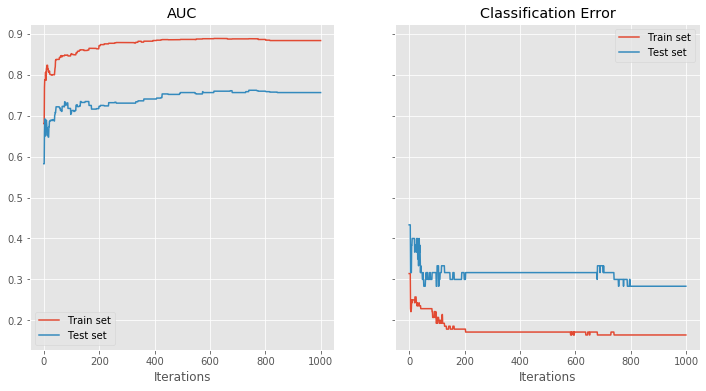

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6), sharey=True)

# PLOT 1
ax[0].set_title('AUC')
ax[0].set_xlabel('Iterations')

ax[0].plot(model.evals_result_['validation_0']['auc'], label='Train set')
ax[0].plot(model.evals_result_['validation_1']['auc'], label='Test set')

ax[0].legend()

# PLOT 2
ax[1].set_title('Classification Error')
ax[1].set_xlabel('Iterations')

ax[1].plot(model.evals_result_['validation_0']['error'], label='Train set')
ax[1].plot(model.evals_result_['validation_1']['error'], label='Test set')

ax[1].legend()

plt.show()

More on ROC & AUC [here](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d).
***

### 2. Time to fine-tune our model

> "Where to start when you haven’t ran any model yet?"

1. "Fill reasonable values for key inputs":
    - `learning_rate`: $0.01$;
    - `n_estimators`: $100$ if the size of your data is high, $1000$ is if it is medium-low;
    - `max_depth`: $3$;
    - `subsample`: $0.8$;
    - `colsample_bytree`: $1$;
    - `gamma`: $1$.
2. "Run `model.fit(eval_set, eval_metric)` and diagnose your first run, specifically the `n_estimators` parameter".
3. Optimize `max_depth` parameter:
    - "It represents the depth of each tree, which is the maximum number of different features used in each tree";
    - "I recommend going from a low max_depth ($3$ for instance) and then increasing it incrementally by $1$, and stopping when there’s no performance gain of increasing it":
        - "This will help simplify your model and avoid overfitting".
4. "Now, play around with the learning rate and the features that avoids overfitting":
    - `learning_rate`: "usually between $0.1$ and $0.01$. If you’re focused on performance and have time in front of you, decrease incrementally the learning rate while increasing the number of trees";
    - `subsample`: "for each tree, the percentage of rows taken to build the tree. I recommend not taking out too many rows, as performance will drop a lot. Take values from $0.8$ to $1$";
    - `colsample_bytree`: "number of columns used by each tree. In order to avoid some columns to take too much credit for the prediction (think of it like in recommender systems when you recommend the most purchased products and forget about the long tail), take out a good proportion of columns. Values from $0.3$ to $0.8$ if you have many columns (especially if you did [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or $0.8$ to $1$ if you only have a few columns".
    - `gamma`: "usually misunderstood parameter, it acts as a regularization parameter. Either $0$, $1$ or $5$".

> "The parameter [`base_score`](https://stackoverflow.com/questions/47596486/xgboost-the-meaning-of-the-base-score-parameter) didn’t give me anything. Either it’s not relevant for convergence, or I don’t know how to use it".

***

### 3. Other remarks

> "Look at the feature_importance table, and identify variables that explain more than they should. Your data may be biased! And both your model and parameters irrelevant".

> "Compare two models’ predictions, where one model uses one more variable than the other model. Specifically compare the data where the predictions are different (predicted classes are different)".

> "Remember that in a real life project, if you industrialize an XGBoost model today, tomorrow you will want to improve the model, for instance by adding new features to the model or simply new data. To compare the two models, plot the probability of belonging to class 1 (risk = proba $> 50\%$), like below":

In [9]:
from IPython.display import Image

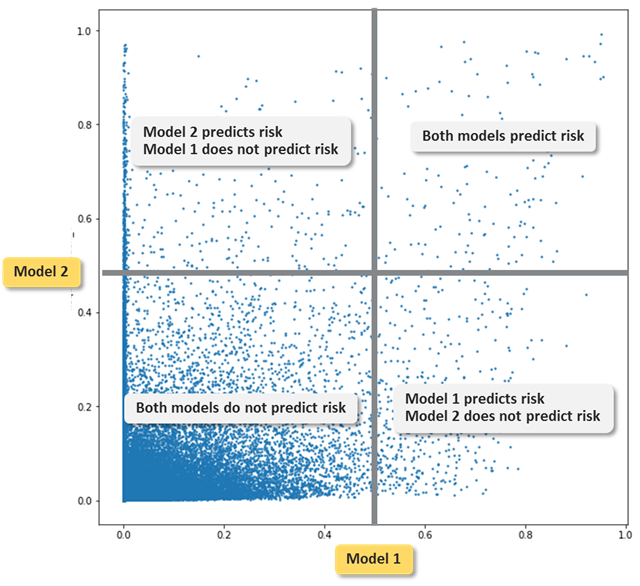

In [10]:
Image('./IMG/model1-model2.png')

> "You will know how your new model compares to the old one, where they are similar and where they are different. Similarly, plot the two feature_importance tables along each other and compare the most relevant features in both model".